# Introduction to Computer Vision: Twitter US Airline Sentiment

## Problem Statement

### Context

Twitter's massive user base of 330 million monthly active users presents a direct avenue for businesses to connect with a broad audience. However, the vast amount of information on the platform makes it challenging for brands to swiftly detect negative social mentions that may impact their reputation. To tackle this, sentiment analysis has become a crucial tool in social media marketing, enabling businesses to monitor emotions in conversations, understand customer sentiments, and gain insights to stay ahead in their industry.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

### Objective

The aim of this project is to build a sentimental analysis model that classify the sentiment of tweets into the positive, neutral & negative.

### Data Dictionary

* tweet_id - A unique identifier for each tweet                                                          
* airline_sentiment - The sentiment label of the tweet, such as positive, negative, or neutral                                               
* airline_sentiment_confidence - The confidence level associated with the sentiment label                               
* negativereason - A category indicating the reason for negative sentiment                                                   
* negativereason_confidence - The confidence level associated with the negative reason                                    
*airline - The airline associated with the tweet                                                                   
* airline_sentiment_gold - Gold standard sentiment label                                               
* name - The username of the tweet author    
* retweet_count - The number of times the tweet has been retweeted
* text - The actual text content of the tweet.
* tweet_coord - Coordinates of the tweet
* tweet_created - The timestamp when the tweet was created
* tweet_location - The location mentioned in the tweet
* user_timezone - The timezone of the tweet author

## Importing necessary libraries

In [1]:
# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.
import seaborn as sns                                   # Import seaborn
import matplotlib.pyplot as plt                         # Import Matplotlib

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
from wordcloud import WordCloud,STOPWORDS               # Import WorldCloud and Stopwords
from sklearn.feature_extraction.text import CountVectorizer # Import count Vectorizer
from sklearn.model_selection import train_test_split    # Import train test split
from sklearn.ensemble import RandomForestClassifier     # Import Rndom Forest Classifier
from sklearn.model_selection import cross_val_score     # Import cross val score
from sklearn.metrics import confusion_matrix            # Import confusion matrix
from wordcloud import WordCloud                         # Import Word Cloud
from sklearn.feature_extraction.text import TfidfVectorizer # Import Tf-Idf vector
import nltk
nltk.download('omw-1.4')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.7 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## Loading the dataset

In [2]:
# Mount Google drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/AIML/Natural Language Processing/Tweets.csv')

## Data Overview

The initial steps to get an overview of any dataset is to:
- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.

### Check the head and tail of the data

In [ ]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [4]:
data['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

### Understand the shape of the dataset

In [ ]:
data.shape

(14640, 15)

### Checking for Missing Values

In [ ]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
data.duplicated().sum()

36

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

- What is the percentage of tweets for each airline?
- What is the distribution of sentiments across all the tweets?
- What is the distribution of sentiments for each airline?
- What does the plot of negative reasons indicate?
- How does a wordcloud appear for negative tweets?
- How does a wordcloud appear for positive tweets?
- What are insights observed from EDA?

### Univariate Analysis

In [6]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Percentage of tweets for each airline



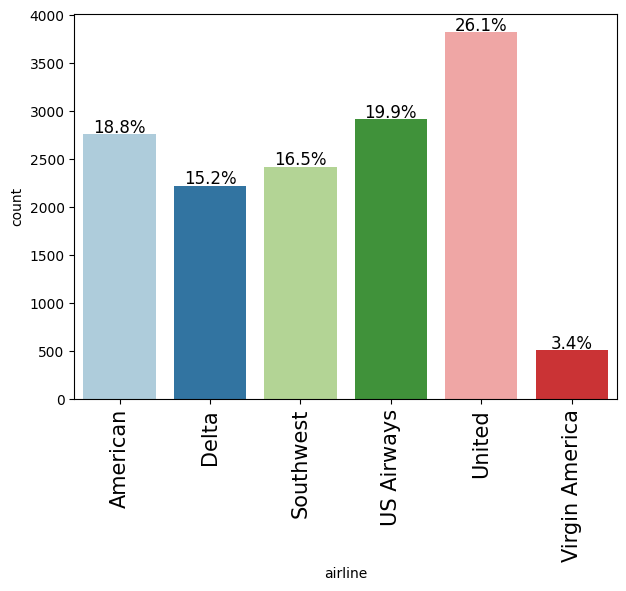

In [ ]:
labeled_barplot(data, 'airline', perc=True)

#### Distribution of sentiments across all the tweets

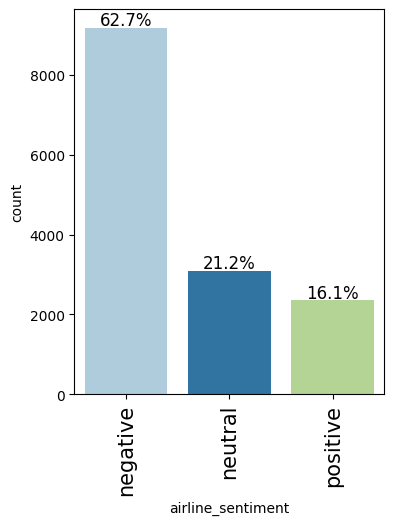

In [ ]:
labeled_barplot(data, 'airline_sentiment', perc=True)

#### Plot of all the negative reasons

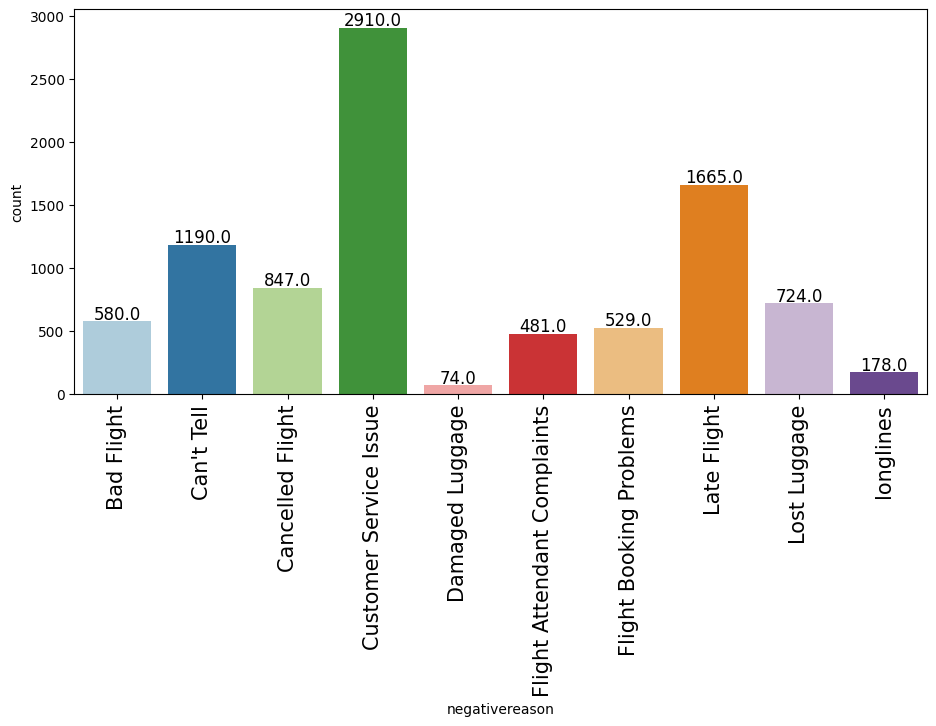

In [7]:
labeled_barplot(data, 'negativereason')

### Bivariate Analysis

#### Distribution of Sentiment of tweets for each airline

<Axes: xlabel='airline'>

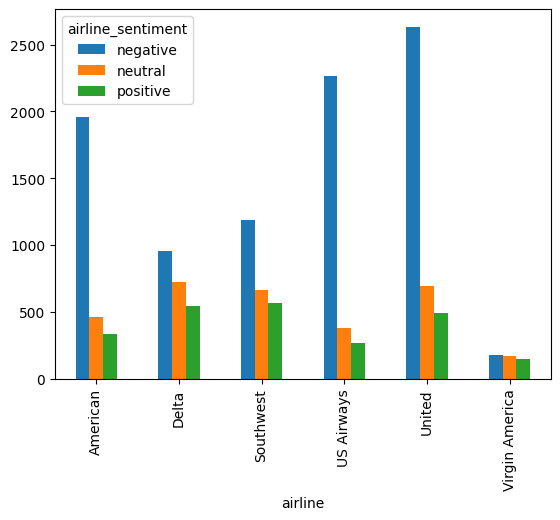

In [ ]:
airline_sentiment =  data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

#### Wordcloud for negative tweets

In [ ]:
airline_tweets = data[data['airline_sentiment'] == 'negative']
words = ' '.join(data['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

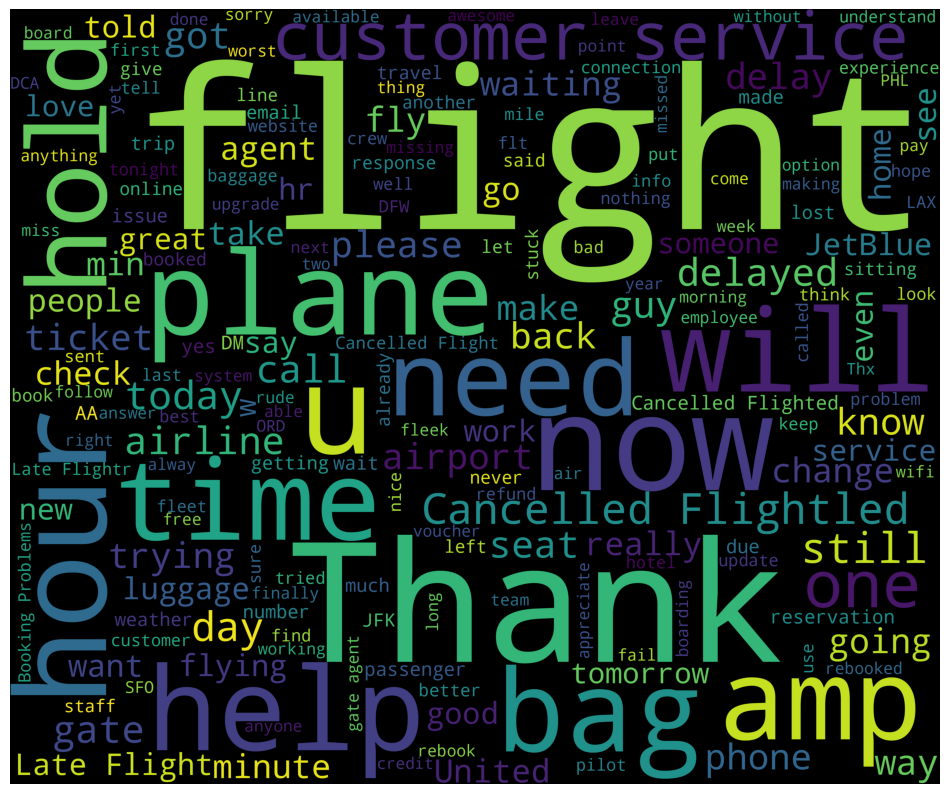

In [ ]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Wordcloud for positive tweets

In [ ]:
airline_tweets = data[data['airline_sentiment'] == 'positive']
words = ' '.join(data['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

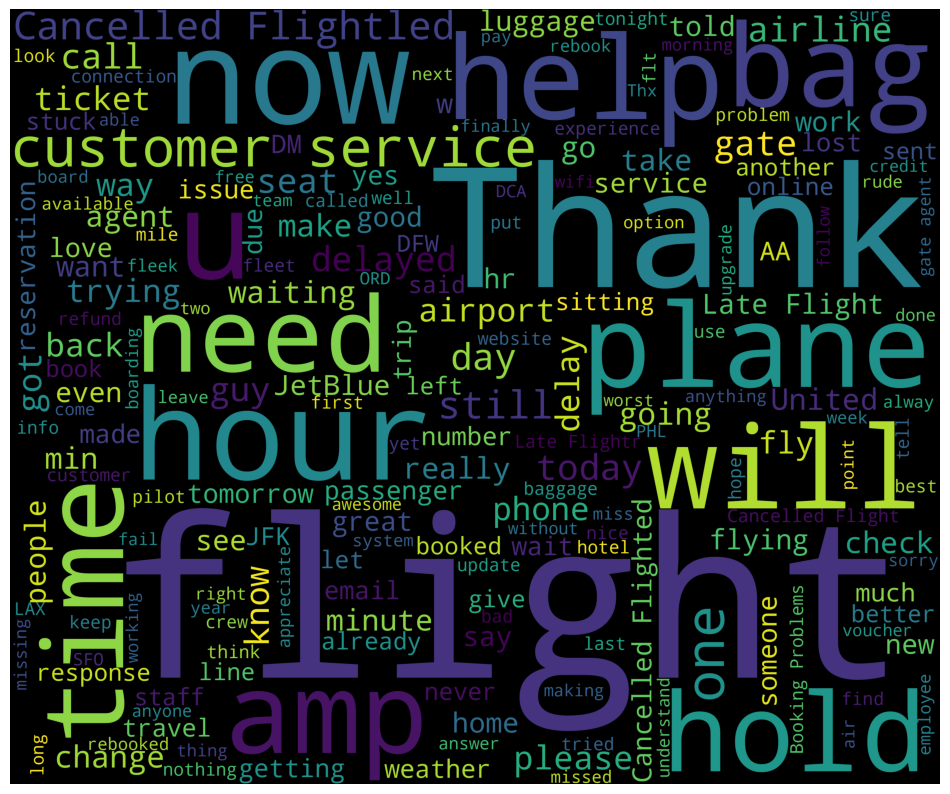

In [ ]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Data Preparation for Modeling

- Drop all unnecessary columns
- Remove html tags
- Replace contractions in string(e.g. replace I'm --> I am) and so on.\
- Remove numbers
- Tokenization
- To remove Stopwords
- Lemmatized data

### Drop all unnecessary columns

In [ ]:
# Take text and airline sentiment columns from the data
data = data[['text', 'airline_sentiment']]

In [ ]:
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [ ]:
data.shape

(14640, 2)

In [ ]:
data['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [ ]:
data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Remove HTML Tags

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(strip_html)
data.head()

<ipython-input-37-48851baa60cc>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
<ipython-input-37-48851baa60cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(strip_html)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


### Replace contractions in string

In [ ]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data.head()

<ipython-input-38-2eae98963a54>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: replace_contractions(x))


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials...,positive
2,@VirginAmerica I did not today... Must mean I ...,neutral
3,@VirginAmerica it is really aggressive to blas...,negative
4,@VirginAmerica and it is a really big bad thin...,negative


### Remove numbers

In [ ]:
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)  # This regex will remove all digits
    return text

# Apply the remove_numbers function to the 'text' column
data['text'] = data['text'].apply(remove_numbers)
data.head()

<ipython-input-39-a4f2ed434190>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(remove_numbers)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials...,positive
2,@VirginAmerica I did not today... Must mean I ...,neutral
3,@VirginAmerica it is really aggressive to blas...,negative
4,@VirginAmerica and it is a really big bad thin...,negative


### Apply Tokenization

In [ ]:
data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [ ]:
# Apply tokenization on text column
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

# Display the head of the data
data.head()

<ipython-input-40-a6561979c05b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)


,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, com...",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Mu...",neutral
3,"[@, VirginAmerica, it, is, really, aggressive,...",negative
4,"[@, VirginAmerica, and, it, is, a, really, big...",negative


### Applying lowercase and removing stopwords and punctuation

**Adding Stopwords**

In [ ]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))

**All the preprocessing steps in one function**

In [ ]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

<ipython-input-42-1d809eac367f>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)


,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience ...,positive
2,virginamerica not today must mean need take an...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative


## Model Building

### Using countvectorizer

- Intialize countvectorizer and use it for vectorization
- Store Independent and Dependent variables
- Split the data into train and test
- Build a Random Forest model on train data
- Use Cross validation to validate the score and to find optimal n_estimators
- Plot the misclassification error for each of estimators
- Test the model on testing data
- Plot the Confusion matrix
plot word cloud for top 20 important features obtained from Count vectorizer and random forest model


In [ ]:
# Vectorization (Convert text data to numbers).

# Initialize the CountVectorizer function with max_features = 5000
Count_vec = CountVectorizer(max_features=5000)

# Fit and transform the count_vec variable on the 'text' column
data_features = Count_vec.fit_transform(data['text'])

# Convert the dataframe into an array
data_features = data_features.toarray()

In [ ]:
data_features.shape

(14640, 5000)

#### Store Independent and Dependent variables

In [ ]:
X = data_features

y = data.airline_sentiment

#### Split the data into train and test

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

#### Random Forest Model

In [ ]:
# Initialize the Random Forest Classifier with desired parameters
forest = RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=42)

# Fit the forest variable on X_train and y_train
forest.fit(X_train, y_train)

# Calculate cross-validation score using cross_val_score function
cv_score = np.mean(cross_val_score(forest, X, y, cv=10))

print("Random Forest Classifier:")
print(forest)
print("Cross Validation Score: {:.2f}".format(cv_score))

Random Forest Classifier:
RandomForestClassifier(n_jobs=4, random_state=42)
Cross Validation Score: 0.73


##### Optimize the parameter: The number of trees in the random forest model(n_estimators)

In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]

In [ ]:
# K-Fold Cross - validation

# Initialize a empty list to store the score
cv_scores = []

for b in base_ln:
    # Initialize the Random Forest Classifier with the current number of estimators
    clf = RandomForestClassifier(n_estimators=b, random_state=42)

    # Perform cross-validation and get the scores
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

    # Append the mean score to cv_scores list
    cv_scores.append(scores.mean())

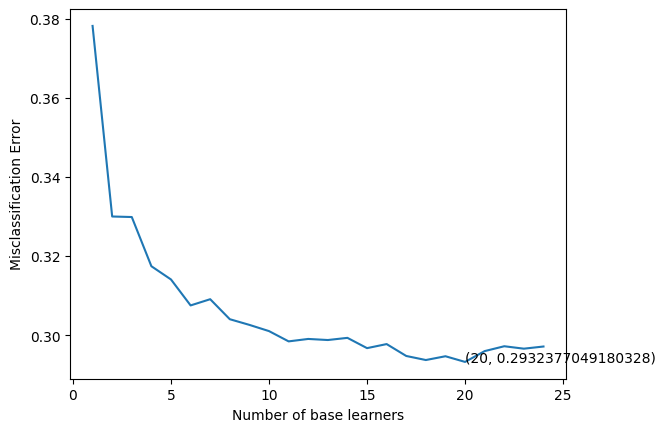

In [ ]:
# Plot the error as k increases

# Error corresponds to each number of estimator
error = [1 - x for x in cv_scores]

# Selection of optimal number of n_estimator corresponds to minimum error.
optimal_learners = base_ln[error.index(min(error))]

# Plot between each number of estimator and misclassification error
plt.plot(base_ln, error)
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Train the best model and calculating accuracy on test data

# Initialize the Random Forest classifier with optimal learners
clf = RandomForestClassifier(n_estimators=optimal_learners)

# Fit the classifer on X_train and y_train
clf.fit(X_train, y_train)

result = clf.predict(X_test)

print(result)

['positive' 'negative' 'negative' ... 'negative' 'neutral' 'negative']


In [ ]:
# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, result)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_mat)

Confusion Matrix:
[[1703  144   42]
 [ 244  284   52]
 [ 121   60  278]]


<Axes: >

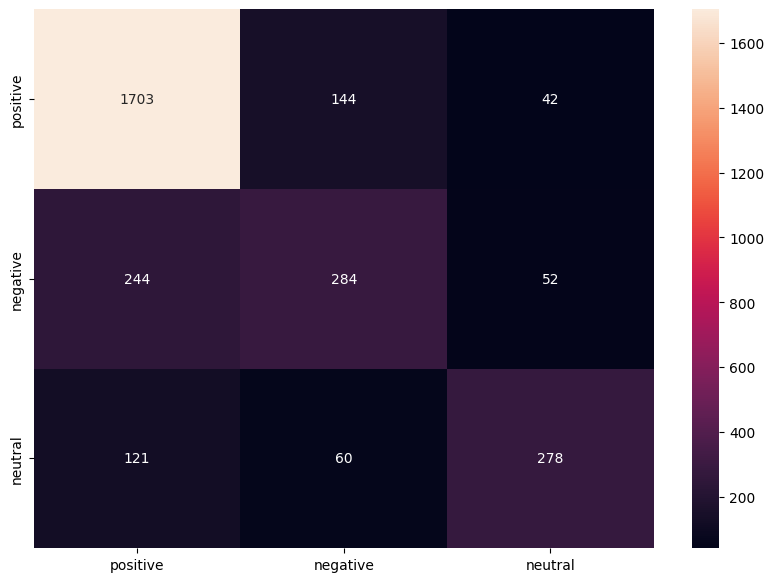

In [ ]:
# Plot the confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive', 'negative', 'neutral']],
                  columns = [i for i in ['positive', 'negative', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Wordcloud of top 20 important features from countvectorizer+Randomforest based mode

In [ ]:
# Instantiate the feature from the vectorizer
all_features = Count_vec.get_feature_names_out()

# Addition of top 20 feature into top_feature after training the model
top_features=''
feat = clf.feature_importances_
features = np.argsort(feat)[::-1]
for i in features[0:20]:
    top_features+=all_features[i]
    top_features+=','

print(top_features)

print(" ")
print(" ")

# Apply wordcloud on top features
wordcloud = WordCloud(
      background_color="white",
      colormap='viridis',
      width=2000,
      height=1000
    ).generate(top_features)

thank,not,great,delay,usairways,jetblue,flight,http,unite,hours,love,hold,southwestair,awesome,cancel,get,bag,americanair,call,wait,
 
 


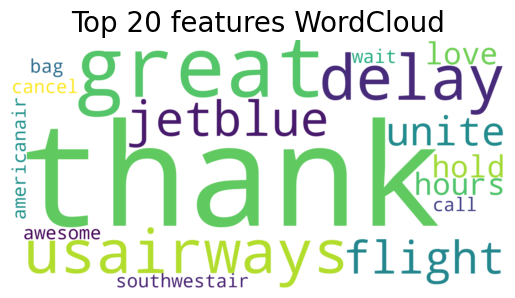

In [ ]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 20 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

### Using TF-IDF (Term Frequency- Inverse Document Frequency)

- Intialize TFIDF and use it for vectorization
- Store Independent and Dependent variables
- Split the data into train and test
- Build a Random Forest model on train data
- Use Cross validation to validate the score and to find optimal n_estimators
- Plot the misclassification error for each of estimators
- Test the model on testing data
- Plot the Confusion matrix
plot word cloud for top 20 important features obtained from TFIDF and random forest model


In [ ]:
# Initialize the TF-IDF vectorizer with max_features = 5000
tfidf_vect = TfidfVectorizer(max_features=5000)

# Fit the TF-IDF vectorizer on the 'text' column
data_features = tfidf_vect.fit_transform(data['text'])

# Convert the resulting sparse matrix into an array
data_features = data_features.toarray()

In [ ]:
data_features.shape

(14640, 5000)

#### Store Independent and Dependent variables

In [ ]:
X = data_features

y = data.airline_sentiment

#### Split the data into train and test

In [ ]:
# Split data into training and testing set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Random Forest Model

In [ ]:
# Using Random Forest to build model for the classification of reviews.

# Initialize the Random Forest Classifier with desired parameters
forest = RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=42)

# Fit the forest variable on X_train and y_train
forest.fit(X_train, y_train)

# Calculate cross-validation score using cross_val_score function
cv_score = np.mean(cross_val_score(forest, X, y, cv=10))

print("Random Forest Classifier:")
print(forest)
print("Cross Validation Score: {:.2f}".format(cv_score))

Random Forest Classifier:
RandomForestClassifier(n_jobs=4, random_state=42)
Cross Validation Score: 0.73


##### Optimize the parameter: The number of trees in the random forest model(n_estimators)

In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]

In [ ]:
# K-Fold Cross - validation

# Initialize a empty list to store the score
cv_scores = []

for b in base_ln:
    # Initialize the Random Forest Classifier with the current number of estimators
    clf = RandomForestClassifier(n_estimators=b, random_state=42)

    # Perform cross-validation and get the scores
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

    # Append the mean score to cv_scores list
    cv_scores.append(scores.mean())

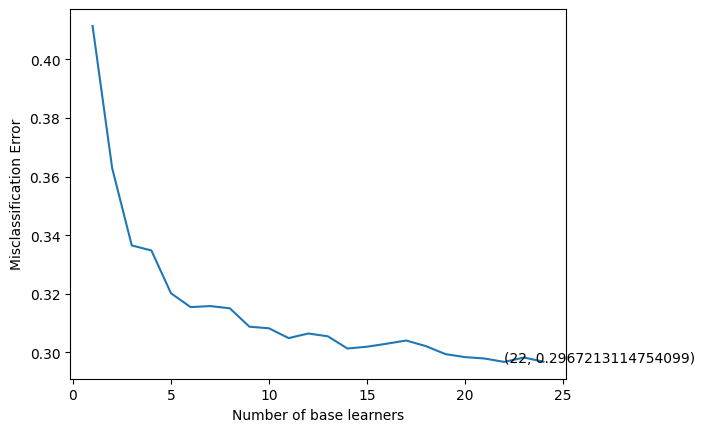

In [ ]:
# Plot the misclassification error for each of estimators

# Error corresponds to each number of estimator
error = [1 - x for x in cv_scores]

# Selection of optimal number of n_estimator corresponds to minimum error.
optimal_learners = base_ln[error.index(min(error))]

# Plot between each number of estimator and misclassification error
plt.plot(base_ln, error)
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Train the best model and calculating accuracy on test data

# Initialize the Random Forest classifier with optimal learners
clf = RandomForestClassifier(n_estimators=optimal_learners)

# Fit the classifer on X_train and y_train
clf.fit(X_train, y_train)

result = clf.predict(X_test)

print(result)

['positive' 'negative' 'negative' ... 'negative' 'neutral' 'negative']


<Axes: >

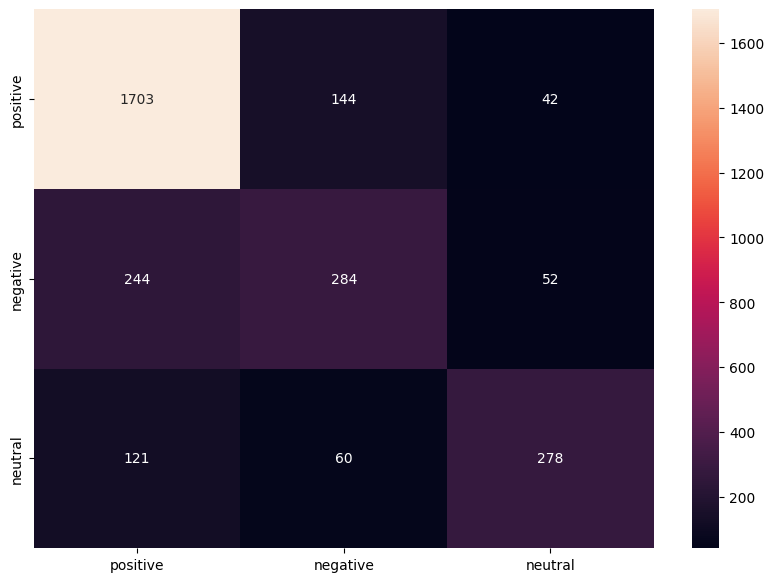

In [ ]:
# Plot the confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive', 'negative', 'neutral']],
                  columns = [i for i in ['positive', 'negative', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Wordcloud of top 20 important features from TF-IDF+Randomforest based mode

In [ ]:
# Instantiate the feature from the vectorizer
all_features = tfidf_vect.get_feature_names_out()

# Addition of top 40 feature into top_feature after training the model
top_features = ''

feat = clf.feature_importances_
features = np.argsort(feat)[::-1]

for i in features[0:20]:
    top_features+=all_features[i]
    top_features+=', '

print(top_features)

print(" ")
print(" ")

# Complete the code by applying wordcloud on top features
wordcloud = WordCloud(
      background_color="white",
      colormap='viridis',
      width=2000,
      height=1000
    ).generate(top_features)

thank, not, jetblue, unite, usairways, southwestair, americanair, flight, http, great, delay, hold, love, get, hours, virginamerica, awesome, bag, wait, dm, 
 
 


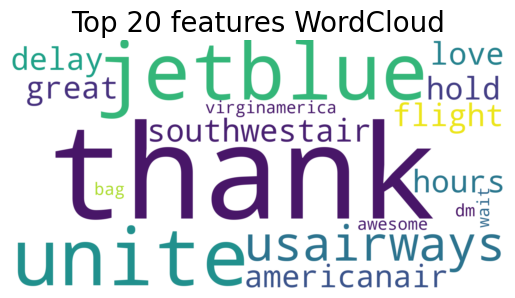

In [ ]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 20 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

## Summary

---



**Data Pre-processing:**

- We started by performing essential data pre-processing tasks, such as handling missing values, removing duplicate records, and ensuring data consistency.

- Text data required special attention, and we applied techniques like lowercasing, punctuation removal, and HTML tag stripping to clean the text content.

- We also expanded contractions in the text to improve the quality of our dataset.

- Numerical data was standardized and scaled to ensure consistent units and distribution.
We removed or imputed outliers as necessary for a clean dataset.

**Vectorization:**

- To convert the textual data into numerical features suitable for machine learning, we used the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization method. This method captures the importance of words in documents while considering their frequency across the dataset.

- We also explored other vectorization techniques such as Count Vectorization to represent the text data in different formats.

- The maximum number of features for vectorization was set to 5000 to strike a balance between data dimensionality and model performance.

**Model Building and Evaluation:**

- For sentiment analysis, we experimented with different machine learning algorithms, with the Random Forest Classifier showing the best performance.

- We used k-fold cross-validation to tune hyperparameters and assess the model's generalization capabilities.

- The optimal number of estimators was determined through hyperparameter tuning.

- Finally, the model was trained on the training data and evaluated on a separate test dataset to assess its accuracy and predictive power.

**Performance Metrics:**

- In evaluating model performance, we considered accuracy.

- The confusion matrix was used to analyze true positives, true negatives, false positives, and false negatives.

**Results:**

Further improvements can be explored by fine-tuning the model, considering feature engineering, and potentially incorporating deep learning techniques for NLP tasks.